https://www.youtube.com/watch?v=GIsg-ZUy0MY

https://jovian.ai/aakashns/01-pytorch-basics   
https://jovian.ai/aakashns/02-linear-regression              
https://jovian.ai/aakashns/03-logistic-regression             
https://jovian.ai/aakashns/04-feedforward-nn             
https://jovian.ai/aakashns/05-cifar10-cnn             
https://jovian.ai/aakashns/05b-cifar10-resnet            
https://jovian.ai/aakashns/06-mnist-gan                 

https://www.youtube.com/watch?v=Egz4bXMlmDM                       
https://colab.research.google.com/drive/1as06U0uFB9TACaQnGo9AnsybounMcjay                  

# Тензоры и градиенты (матрицы и производные)

In [ ]:
import torch
import numpy as np

In [ ]:
t1 = torch.tensor(4.)
t1.dtype
t1.shape

torch.Size([])

In [ ]:
# Vector
t2 = torch.tensor([1., 2, 3, 4])
t2.dtype
t2.shape

#t2 = torch.tensor([1., 2, 3, 4])
#t2.dtype

torch.Size([4])

In [ ]:
t3 = torch.tensor([[5., 6], 
                   [7, 8], 
                   [9, 10]])
t3

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [ ]:
t4 = torch.tensor([
    [[11, 12, 13], 
     [13, 14, 15]], 
    [[15, 16, 17], 
     [17, 18, 19.]]])

t4.shape

torch.Size([2, 2, 3])

In [ ]:
# задаем requires_grad=True, чтобы отслеживать вычисления с ним

x = torch.tensor(5.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)
x, w, b

(tensor(5.), tensor(4., requires_grad=True), tensor(5., requires_grad=True))

In [ ]:
y = w * x + b
y

tensor(25., grad_fn=<AddBackward0>)

In [ ]:
# скомпилировать производные (деривативы)
y.backward()

In [ ]:
# Градиенты (градиент это типа n-мерная производная, поверхность роста или падения)
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dx: None
dy/dw: tensor(5.)
dy/db: tensor(1.)


In [ ]:
x = np.array([[1, 2], [3, 4.]])
x

y = torch.from_numpy(x)
y

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [ ]:
z = y.numpy()
z

array([[1., 2.],
       [3., 4.]])

# Линейная регрессия. Основы

In [ ]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [ ]:
#randn - массив случайных значений с нормальным распределением

w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[-0.2464,  0.1019, -0.0436],
        [-1.0434, -0.3784, -2.0099]], requires_grad=True)
tensor([ 0.2050, -0.0832], requires_grad=True)


In [ ]:
# @ - матричное умножение, .t - транспонированная матрица; короче это формула линейной регрессии

def model(x, w, b):
  return x @ w.t() + b

preds = model(inputs, w, b)
print(preds)

tensor([[ -12.8236, -188.0305],
        [ -16.0329, -256.9658],
        [ -10.0961, -258.1389],
        [ -22.1529, -197.1496],
        [ -10.0592, -249.0965]], grad_fn=<AddBackward0>)


In [ ]:
# MSE loss; среднеквадратическая ошибка; 
# Вычислите разницу между двумя матрицами (pres и target).
# Возведите в квадрат все элементы разностной матрицы, чтобы удалить отрицательные значения.
# Вычислите среднее значение элементов в результирующей матрице.
# Результатом является одно число, известное как среднеквадратическая ошибка

# numel() - количество элементов

def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

loss = mse(preds, targets)
print(loss)

tensor(58357.9766, grad_fn=<DivBackward0>)


In [ ]:
loss.backward()

In [ ]:
print(w)
print(w.grad)

tensor([[-0.2464,  0.1019, -0.0436],
        [-1.0434, -0.3784, -2.0099]], requires_grad=True)
tensor([[ -7478.0308,  -8640.2422,  -5240.9785],
        [-26944.4258, -29321.4688, -18224.2949]])


In [ ]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5

In [ ]:
loss = mse(preds, targets)
print(loss)

tensor(58357.9766, grad_fn=<DivBackward0>)


In [ ]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


In [ ]:
preds = model(inputs, w, b)
print(preds)

tensor([[   0.6789, -140.8761],
        [   1.7307, -194.9767],
        [  11.0284, -184.8331],
        [  -8.8699, -150.3119],
        [   7.0649, -189.5960]], grad_fn=<AddBackward0>)


In [ ]:
loss = mse(preds, targets)
print(loss)

tensor(39456.4492, grad_fn=<DivBackward0>)


In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[ -6082.7476,  -7137.5186,  -4314.4092],
        [-22075.6523, -24088.7832, -14995.3535]])
tensor([ -73.8734, -264.1188])


In [ ]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [ ]:
print(w)
print(b)

# Calculate loss
preds = model(inputs, w, b)
loss = mse(preds, targets)
print(loss)

tensor([[-0.1107,  0.2597,  0.0519],
        [-0.5532,  0.1557, -1.6777]], requires_grad=True)
tensor([ 0.2067, -0.0773], requires_grad=True)


In [ ]:
# Calculate loss
preds = model(inputs, w, b)
loss = mse(preds, targets)
print(loss)

tensor(26718.0820, grad_fn=<DivBackward0>)


In [ ]:
# короче до этого я типа тренировался, а теперь решил сделать цикл уменьшения ошибки
# no_grad() - контекст-менеджер,в котором отключено вычисление градиента
# Train for 100 epochs

for i in range(10000):
    preds = model(inputs, w, b)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

# Calculate loss
preds = model(inputs, w, b)
loss = mse(preds, targets)
print(loss)

tensor(0.5161, grad_fn=<DivBackward0>)


In [ ]:
preds

tensor([[ 57.1997,  70.2989],
        [ 82.1852, 100.6764],
        [118.6876, 132.9606],
        [ 21.0771,  37.0167],
        [101.9259, 119.1358]], grad_fn=<AddBackward0>)

In [ ]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

# Линейная регрессия. Функции pytorch

In [ ]:
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

In [ ]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [ ]:
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]
#train_ds

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [ ]:
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [ ]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[ 73.,  67.,  43.],
        [ 87., 134.,  58.],
        [ 92.,  87.,  64.],
        [ 91.,  88.,  64.],
        [ 74.,  66.,  43.]])
tensor([[ 56.,  70.],
        [119., 133.],
        [ 82., 100.],
        [ 81., 101.],
        [ 57.,  69.]])


In [ ]:
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.5692, -0.3329, -0.5118],
        [ 0.2799,  0.1484, -0.5550]], requires_grad=True)
Parameter containing:
tensor([-0.0070,  0.1525], requires_grad=True)


In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.5692, -0.3329, -0.5118],
         [ 0.2799,  0.1484, -0.5550]], requires_grad=True),
 Parameter containing:
 tensor([-0.0070,  0.1525], requires_grad=True)]

In [ ]:
preds = model(inputs)
preds

tensor([[ -2.7644,   6.6663],
        [-10.2568,   3.1667],
        [-24.7759,  12.2047],
        [ 24.8036,  14.5521],
        [-28.5139,  -5.1344],
        [ -1.8622,   6.7978],
        [-10.4357,   2.4633],
        [-24.7185,  11.9296],
        [ 23.9015,  14.4206],
        [-29.5949,  -5.9693],
        [ -2.9433,   5.9629],
        [ -9.3547,   3.2982],
        [-24.5970,  12.9082],
        [ 25.8847,  15.3870],
        [-29.4160,  -5.2659]], grad_fn=<AddmmBackward0>)

In [ ]:
loss_fn = F.mse_loss

In [ ]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(9386.6045, grad_fn=<MseLossBackward0>)


In [ ]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [ ]:
fit(1000, model, loss_fn, opt, train_dl)

Epoch [10/1000], Loss: 83.1409
Epoch [20/1000], Loss: 101.4541
Epoch [30/1000], Loss: 30.4670
Epoch [40/1000], Loss: 58.1383
Epoch [50/1000], Loss: 51.2569
Epoch [60/1000], Loss: 63.6103
Epoch [70/1000], Loss: 28.9891
Epoch [80/1000], Loss: 56.5089
Epoch [90/1000], Loss: 21.8537
Epoch [100/1000], Loss: 53.1190
Epoch [110/1000], Loss: 43.4137
Epoch [120/1000], Loss: 9.2363
Epoch [130/1000], Loss: 26.8498
Epoch [140/1000], Loss: 28.3073
Epoch [150/1000], Loss: 25.8369
Epoch [160/1000], Loss: 17.8191
Epoch [170/1000], Loss: 21.3483
Epoch [180/1000], Loss: 21.1218
Epoch [190/1000], Loss: 24.6245
Epoch [200/1000], Loss: 28.4704
Epoch [210/1000], Loss: 18.2353
Epoch [220/1000], Loss: 14.5746
Epoch [230/1000], Loss: 12.8322
Epoch [240/1000], Loss: 16.5273
Epoch [250/1000], Loss: 8.7906
Epoch [260/1000], Loss: 8.2501
Epoch [270/1000], Loss: 11.4812
Epoch [280/1000], Loss: 15.5740
Epoch [290/1000], Loss: 14.5325
Epoch [300/1000], Loss: 9.2041
Epoch [310/1000], Loss: 16.5877
Epoch [320/1000], Lo

In [ ]:
preds = model(inputs)
preds

tensor([[ 56.9784,  70.4296],
        [ 81.8224, 100.1892],
        [118.6510, 133.3778],
        [ 20.9422,  37.8896],
        [101.4197, 117.8564],
        [ 55.7273,  69.3436],
        [ 81.6393, 100.2290],
        [118.9238, 133.9473],
        [ 22.1933,  38.9756],
        [102.4876, 118.9822],
        [ 56.7952,  70.4693],
        [ 80.5714,  99.1032],
        [118.8342, 133.3380],
        [ 19.8742,  36.7639],
        [102.6707, 118.9424]], grad_fn=<AddmmBackward0>)

In [ ]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

In [ ]:
model(torch.tensor([[73, 67, 43.]]))

tensor([[56.9784, 70.4296]], grad_fn=<AddmmBackward0>)

In [ ]:
model(torch.tensor([[75, 70, 42.]]))

tensor([[58.0733, 71.4493]], grad_fn=<AddmmBackward0>)

# Логистическая регрессия (используется модель, предполагающая линейную зависимость между интенсивностью пикселей и метками)

In [ ]:
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
dataset = MNIST(root='data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
len(dataset)

60000

In [ ]:
test_dataset = MNIST(root='data/', train=False)

In [ ]:
test_dataset[0][0]

In [ ]:
test_dataset[0][0].size[0]

28

Label: 5


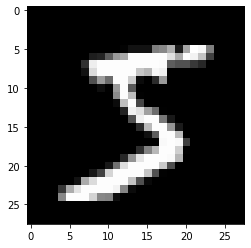

In [ ]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [ ]:
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [ ]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [ ]:
a = []
for i in range(0,60000):
  a.append(dataset[i][1])

myset = set(a)
print(myset)
print(len(myset))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
10


In [ ]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


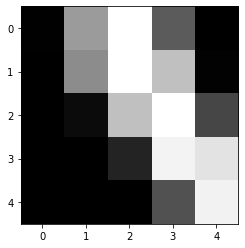

In [ ]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [ ]:
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [ ]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [ ]:
# всё стандартно: хочет сделать набор векторов, перемолоть, получить результат

width = test_dataset[0][0].size[0]
height = test_dataset[0][0].size[1]
input_size = width*height #28*28
num_classes = len(myset) #10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [ ]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0041,  0.0207, -0.0279,  ...,  0.0157, -0.0148, -0.0105],
        [ 0.0264,  0.0337, -0.0192,  ..., -0.0250,  0.0010,  0.0033],
        [ 0.0198, -0.0126,  0.0083,  ..., -0.0197,  0.0073, -0.0264],
        ...,
        [-0.0197,  0.0218, -0.0053,  ...,  0.0352,  0.0069, -0.0320],
        [ 0.0066, -0.0228, -0.0095,  ...,  0.0315,  0.0114, -0.0105],
        [ 0.0012,  0.0046, -0.0305,  ...,  0.0228, -0.0334, -0.0061]],
       requires_grad=True)

In [ ]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0166, -0.0266, -0.0329, -0.0138,  0.0205, -0.0237, -0.0307, -0.0319,
        -0.0273, -0.0003], requires_grad=True)

In [ ]:
class Person:
    # Class constructor
    def __init__(self, name, age):
        # Object properties
        self.name = name
        self.age = age
    
    # Method
    def say_hello(self):
        print("Hello my name is " + self.name + "!")

bob = Person("Bob", 32)

In [ ]:
bob.say_hello()

Hello my name is Bob!


In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [ ]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [ ]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0034,  0.0007,  0.0257,  ...,  0.0338,  0.0226, -0.0239],
         [ 0.0267, -0.0057,  0.0269,  ..., -0.0185,  0.0059,  0.0076],
         [ 0.0174, -0.0098,  0.0254,  ..., -0.0335,  0.0054, -0.0035],
         ...,
         [ 0.0176,  0.0114, -0.0231,  ...,  0.0321,  0.0085, -0.0278],
         [-0.0012, -0.0336,  0.0312,  ...,  0.0040, -0.0125, -0.0294],
         [-0.0054,  0.0032, -0.0087,  ..., -0.0099, -0.0305, -0.0337]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0349,  0.0267,  0.0060, -0.0067, -0.0333, -0.0187,  0.0060,  0.0002,
         -0.0252, -0.0206], requires_grad=True)]

In [ ]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.0540,  0.0639, -0.1990,  0.2717,  0.4465,  0.1533, -0.0842, -0.1504,
         -0.1694,  0.0471],
        [-0.0759,  0.1940,  0.1863,  0.3209,  0.2979,  0.0594, -0.0348, -0.1564,
         -0.0726,  0.0162]])


In [ ]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0898, 0.1011, 0.0777, 0.1244, 0.1482, 0.1105, 0.0872, 0.0816, 0.0800,
         0.0994],
        [0.0850, 0.1114, 0.1105, 0.1265, 0.1236, 0.0974, 0.0886, 0.0785, 0.0853,
         0.0932]])
Sum:  0.9999998807907104


In [ ]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 3, 5, 4, 5, 4, 1, 3, 1, 1, 5, 9, 3, 1, 3, 5, 5, 1, 3, 9, 3, 3, 1, 1,
        3, 3, 1, 3, 4, 5, 3, 8, 8, 3, 5, 5, 3, 2, 3, 3, 1, 6, 4, 1, 1, 1, 1, 1,
        4, 6, 3, 8, 3, 8, 1, 3, 3, 3, 1, 2, 3, 1, 1, 3, 3, 3, 8, 4, 9, 3, 4, 1,
        3, 3, 8, 4, 3, 6, 6, 3, 5, 3, 1, 1, 5, 6, 3, 3, 1, 0, 1, 3, 5, 6, 3, 4,
        3, 4, 6, 3, 1, 3, 4, 6, 3, 0, 3, 1, 5, 8, 5, 6, 4, 6, 1, 1, 1, 1, 6, 3,
        1, 5, 1, 3, 4, 3, 3, 1])
tensor([0.1482, 0.1265, 0.1322, 0.1394, 0.1341, 0.1425, 0.1121, 0.1219, 0.1302,
        0.1213, 0.1299, 0.1169, 0.1266, 0.1213, 0.1258, 0.1369, 0.1141, 0.1720,
        0.1444, 0.1240, 0.1754, 0.1562, 0.1401, 0.1287, 0.1267, 0.1279, 0.1215,
        0.1366, 0.1310, 0.1239, 0.1370, 0.1344, 0.1339, 0.1275, 0.1177, 0.1319,
        0.1819, 0.1355, 0.1274, 0.1200, 0.1484, 0.1312, 0.1308, 0.1272, 0.1107,
        0.1451, 0.1234, 0.1288, 0.1219, 0.1377, 0.1214, 0.1141, 0.1311, 0.1265,
        0.1567, 0.1267, 0.1311, 0.1148, 0.1189, 0.1275, 0.1279, 0.1331, 0.1245,
       

In [ ]:
labels

tensor([3, 7, 1, 2, 3, 9, 0, 1, 9, 8, 2, 0, 3, 7, 4, 4, 0, 7, 3, 0, 2, 8, 8, 8,
        4, 9, 6, 0, 2, 6, 3, 4, 6, 1, 3, 5, 8, 9, 7, 5, 3, 6, 0, 4, 5, 8, 0, 9,
        7, 0, 3, 4, 1, 8, 3, 1, 0, 1, 9, 4, 9, 8, 3, 0, 7, 1, 6, 6, 0, 2, 5, 5,
        6, 6, 0, 4, 7, 6, 0, 7, 8, 0, 5, 8, 3, 3, 7, 1, 3, 4, 4, 1, 7, 8, 7, 7,
        8, 4, 4, 1, 7, 0, 4, 2, 7, 4, 5, 0, 1, 0, 6, 0, 4, 0, 8, 4, 8, 4, 0, 8,
        3, 4, 3, 7, 7, 7, 8, 8])

In [ ]:
torch.sum(preds == labels)

tensor(12)

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
accuracy(outputs, labels)

tensor(0.0938)

In [ ]:
loss_fn = F.cross_entropy

In [ ]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3284, grad_fn=<NllLossBackward0>)


In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [ ]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.282973051071167, 'val_acc': 0.09770569950342178}

In [ ]:
history1 = fit(20, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1083, val_acc: 0.8075
Epoch [1], val_loss: 1.0365, val_acc: 0.8153
Epoch [2], val_loss: 0.9778, val_acc: 0.8217
Epoch [3], val_loss: 0.9289, val_acc: 0.8260
Epoch [4], val_loss: 0.8875, val_acc: 0.8296
Epoch [5], val_loss: 0.8520, val_acc: 0.8324
Epoch [6], val_loss: 0.8212, val_acc: 0.8358
Epoch [7], val_loss: 0.7943, val_acc: 0.8381
Epoch [8], val_loss: 0.7705, val_acc: 0.8397
Epoch [9], val_loss: 0.7493, val_acc: 0.8418
Epoch [10], val_loss: 0.7302, val_acc: 0.8440
Epoch [11], val_loss: 0.7130, val_acc: 0.8465
Epoch [12], val_loss: 0.6974, val_acc: 0.8480
Epoch [13], val_loss: 0.6832, val_acc: 0.8495
Epoch [14], val_loss: 0.6701, val_acc: 0.8507
Epoch [15], val_loss: 0.6581, val_acc: 0.8527
Epoch [16], val_loss: 0.6470, val_acc: 0.8535
Epoch [17], val_loss: 0.6367, val_acc: 0.8546
Epoch [18], val_loss: 0.6271, val_acc: 0.8552
Epoch [19], val_loss: 0.6181, val_acc: 0.8556


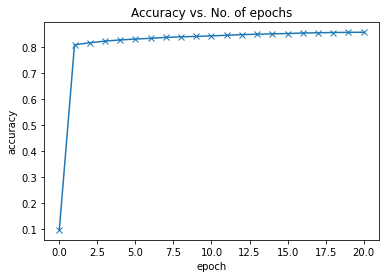

In [ ]:
history = [result0] + history1
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [ ]:
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


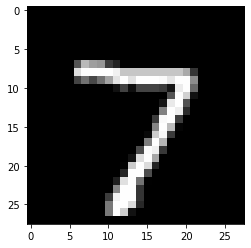

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

Label: 7 , Predicted: 7


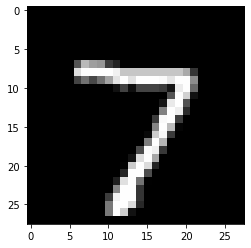

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.5861459970474243, 'val_acc': 0.8680664300918579}

In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0066, -0.0351, -0.0315,  ..., -0.0207,  0.0214, -0.0014],
                      [-0.0137,  0.0172, -0.0019,  ..., -0.0250,  0.0205, -0.0323],
                      [-0.0316,  0.0121, -0.0215,  ..., -0.0200,  0.0274,  0.0084],
                      ...,
                      [ 0.0051, -0.0070,  0.0333,  ..., -0.0009,  0.0237,  0.0099],
                      [ 0.0274,  0.0189, -0.0202,  ..., -0.0321,  0.0168,  0.0223],
                      [ 0.0177,  0.0316, -0.0347,  ...,  0.0203, -0.0260,  0.0209]])),
             ('linear.bias',
              tensor([-0.0761,  0.1338, -0.0416, -0.0005,  0.0451,  0.0777, -0.0199,  0.0693,
                      -0.1236, -0.0192]))])

In [ ]:
model2 = MnistModel()

In [ ]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0132,  0.0252, -0.0101,  ...,  0.0015,  0.0239,  0.0074],
                      [ 0.0268,  0.0338,  0.0171,  ...,  0.0236,  0.0016,  0.0006],
                      [-0.0193, -0.0253,  0.0025,  ..., -0.0230,  0.0023, -0.0159],
                      ...,
                      [ 0.0216, -0.0290,  0.0339,  ..., -0.0277, -0.0346, -0.0016],
                      [ 0.0354,  0.0238,  0.0296,  ...,  0.0215, -0.0049, -0.0217],
                      [-0.0225, -0.0308,  0.0226,  ...,  0.0012,  0.0067, -0.0344]])),
             ('linear.bias',
              tensor([ 0.0287,  0.0199, -0.0116,  0.0253, -0.0270, -0.0120,  0.0245,  0.0289,
                       0.0051,  0.0243]))])

In [ ]:
evaluate(model2, test_loader)

{'val_loss': 2.366425037384033, 'val_acc': 0.05517578125}

In [ ]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0066, -0.0351, -0.0315,  ..., -0.0207,  0.0214, -0.0014],
                      [-0.0137,  0.0172, -0.0019,  ..., -0.0250,  0.0205, -0.0323],
                      [-0.0316,  0.0121, -0.0215,  ..., -0.0200,  0.0274,  0.0084],
                      ...,
                      [ 0.0051, -0.0070,  0.0333,  ..., -0.0009,  0.0237,  0.0099],
                      [ 0.0274,  0.0189, -0.0202,  ..., -0.0321,  0.0168,  0.0223],
                      [ 0.0177,  0.0316, -0.0347,  ...,  0.0203, -0.0260,  0.0209]])),
             ('linear.bias',
              tensor([-0.0761,  0.1338, -0.0416, -0.0005,  0.0451,  0.0777, -0.0199,  0.0693,
                      -0.1236, -0.0192]))])

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.5861459970474243, 'val_acc': 0.8680664300918579}

Label: 2 , Predicted: 2


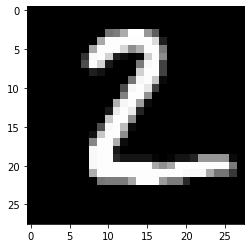

In [ ]:
img, label = test_dataset[1]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model2))

# Логистическая регрессия (модель, предполагающая нелинейную зависимость)

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
dataset = MNIST(root='data/', download=True, transform=ToTensor())

image.shape: torch.Size([1, 28, 28])
Label: 5


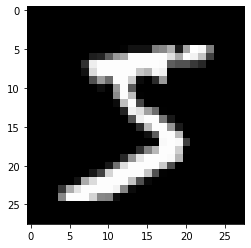

In [ ]:
image, label = dataset[0]
print('image.shape:', image.shape)
#plt.imshow(image.permute(1, 2, 0), cmap='gray')
plt.imshow(image.permute(1, 2, 0)[:,:,0], cmap='gray')
print('Label:', label)
#image

In [ ]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

In [ ]:
batch_size=128
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


images.shape: torch.Size([128, 1, 28, 28])


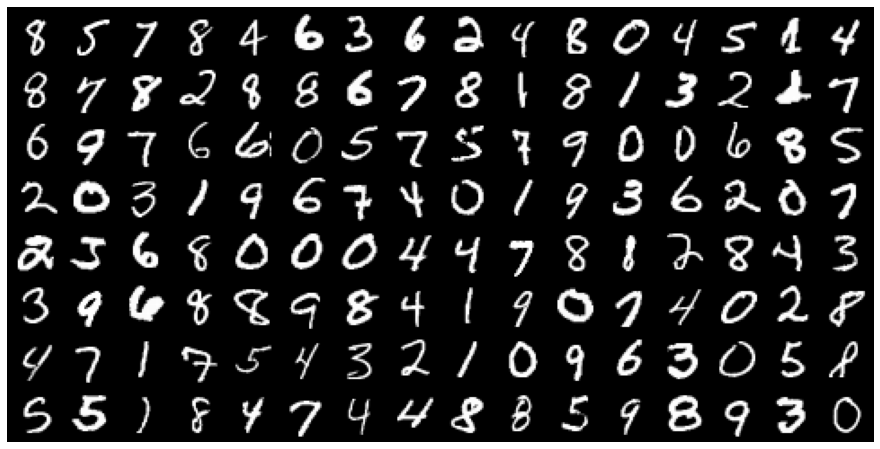

In [ ]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [ ]:
for images, labels in train_loader:
    print('images.shape:', images.shape)
    inputs = images.reshape(-1, 784)
    print('inputs.shape:', inputs.shape)
    break

images.shape: torch.Size([128, 1, 28, 28])
inputs.shape: torch.Size([128, 784])


In [ ]:
input_size = inputs.shape[-1]
hidden_size = 32

In [ ]:
layer1 = nn.Linear(input_size, hidden_size)

In [ ]:
inputs.shape

torch.Size([128, 784])

In [ ]:
layer1_outputs = layer1(inputs)
print('layer1_outputs.shape:', layer1_outputs.shape)

layer1_outputs.shape: torch.Size([128, 32])


In [ ]:
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias
layer1_outputs_direct.shape

torch.Size([128, 32])

In [ ]:
torch.allclose(layer1_outputs, layer1_outputs_direct, 1e-3)

True

In [ ]:
F.relu(torch.tensor([[1, -1, 0], 
                     [-0.1, .2, 3]]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 3.0000]])

In [ ]:
relu_outputs = F.relu(layer1_outputs)
print('min(layer1_outputs):', torch.min(layer1_outputs).item())
print('min(relu_outputs):', torch.min(relu_outputs).item())

min(layer1_outputs): -0.6064202189445496
min(relu_outputs): 0.0


In [ ]:
output_size = 10
layer2 = nn.Linear(hidden_size, output_size)

In [ ]:
layer2_outputs = layer2(relu_outputs)
print(layer2_outputs.shape)

torch.Size([128, 10])


In [ ]:
inputs.shape

torch.Size([128, 784])

In [ ]:
F.cross_entropy(layer2_outputs, labels)

tensor(2.3068, grad_fn=<NllLossBackward0>)

In [ ]:
# Expanded version of layer2(F.relu(layer1(inputs)))
outputs = (F.relu(inputs @ layer1.weight.t() + layer1.bias)) @ layer2.weight.t() + layer2.bias

In [ ]:
torch.allclose(outputs, layer2_outputs, 1e-3)

True

In [ ]:
# Same as layer2(layer1(inputs))
outputs2 = (inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias

In [ ]:
# Create a single layer to replace the two linear layers
combined_layer = nn.Linear(input_size, output_size)

combined_layer.weight.data = layer2.weight @ layer1.weight
combined_layer.bias.data = layer1.bias @ layer2.weight.t() + layer2.bias

In [ ]:
# Same as combined_layer(inputs)
outputs3 = inputs @ combined_layer.weight.t() + combined_layer.bias

In [ ]:
torch.allclose(outputs2, outputs3, 1e-3)

True

In [ ]:
class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
input_size = 784
hidden_size = 32 # you can change this
num_classes = 10

In [ ]:
model = MnistModel(input_size, hidden_size=32, out_size=num_classes)

In [ ]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [ ]:
for images, labels in train_loader:
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print('Loss:', loss.item())
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

Loss: 2.309871196746826
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.0301,  0.0270,  0.0693, -0.0368, -0.0490,  0.0930, -0.2077,  0.1691,
          0.0578,  0.1137],
        [ 0.0957,  0.0093,  0.0882, -0.1142, -0.0847,  0.2024, -0.0860,  0.1491,
          0.1250,  0.0877]])


In [ ]:
torch.cuda.is_available()

False

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [ ]:
device = get_default_device()
device

device(type='cpu')

In [ ]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [ ]:
for images, labels in train_loader:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break

torch.Size([128, 1, 28, 28])
cpu


In [ ]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

In [ ]:
for xb, yb in val_loader:
    print('xb.device:', xb.device)
    print('yb:', yb)
    break

xb.device: cpu
yb: tensor([4, 1, 3, 9, 2, 4, 1, 2, 8, 5, 7, 3, 0, 6, 3, 4, 4, 6, 4, 8, 5, 9, 4, 7,
        4, 4, 0, 2, 9, 5, 9, 0, 0, 3, 6, 9, 6, 2, 6, 5, 2, 8, 7, 3, 0, 5, 0, 6,
        2, 6, 2, 3, 9, 3, 7, 8, 3, 6, 8, 4, 6, 6, 2, 0, 3, 4, 1, 7, 4, 6, 2, 9,
        1, 1, 6, 9, 0, 1, 3, 8, 2, 2, 1, 7, 0, 5, 3, 2, 7, 7, 5, 3, 7, 3, 6, 9,
        4, 1, 9, 2, 2, 6, 0, 5, 4, 1, 3, 1, 1, 9, 7, 9, 0, 2, 2, 6, 3, 1, 2, 7,
        4, 4, 3, 0, 5, 2, 2, 2, 4, 2, 4, 4, 8, 6, 8, 1, 2, 5, 8, 3, 6, 5, 6, 7,
        2, 3, 3, 5, 0, 9, 9, 7, 6, 7, 8, 0, 2, 4, 5, 7, 7, 2, 6, 1, 2, 9, 3, 4,
        8, 6, 5, 7, 1, 3, 1, 1, 2, 8, 1, 0, 6, 1, 2, 6, 1, 5, 6, 5, 9, 2, 4, 8,
        0, 9, 9, 8, 6, 1, 6, 2, 1, 4, 8, 0, 4, 3, 0, 8, 8, 2, 2, 3, 8, 1, 0, 7,
        1, 4, 7, 8, 7, 1, 1, 4, 9, 4, 9, 7, 1, 4, 2, 5, 3, 9, 3, 9, 4, 7, 1, 7,
        6, 1, 7, 8, 8, 0, 8, 2, 3, 4, 2, 0, 2, 5, 9, 2])


In [ ]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = MnistModel(input_size, hidden_size=hidden_size, out_size=num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [ ]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.2994391918182373, 'val_acc': 0.14228515326976776}]

In [ ]:
history += fit(20, 0.5, model, train_loader, val_loader)

Epoch [0], val_loss: 0.2305, val_acc: 0.9341
Epoch [1], val_loss: 0.1968, val_acc: 0.9428
Epoch [2], val_loss: 0.1383, val_acc: 0.9589
Epoch [3], val_loss: 0.1485, val_acc: 0.9566
Epoch [4], val_loss: 0.1306, val_acc: 0.9632
Epoch [5], val_loss: 0.1360, val_acc: 0.9589
Epoch [6], val_loss: 0.1231, val_acc: 0.9631
Epoch [7], val_loss: 0.1230, val_acc: 0.9632
Epoch [8], val_loss: 0.1207, val_acc: 0.9667
Epoch [9], val_loss: 0.1293, val_acc: 0.9630
Epoch [10], val_loss: 0.1207, val_acc: 0.9650
Epoch [11], val_loss: 0.1275, val_acc: 0.9645
Epoch [12], val_loss: 0.1217, val_acc: 0.9633
Epoch [13], val_loss: 0.1255, val_acc: 0.9641
Epoch [14], val_loss: 0.1307, val_acc: 0.9647
Epoch [15], val_loss: 0.1304, val_acc: 0.9656
Epoch [16], val_loss: 0.1241, val_acc: 0.9672
Epoch [17], val_loss: 0.1270, val_acc: 0.9653
Epoch [18], val_loss: 0.1278, val_acc: 0.9668
Epoch [19], val_loss: 0.1395, val_acc: 0.9624


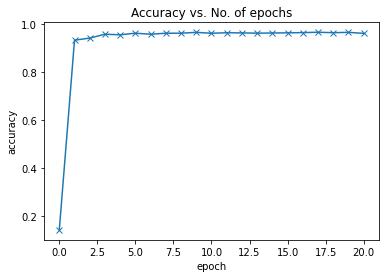

In [ ]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

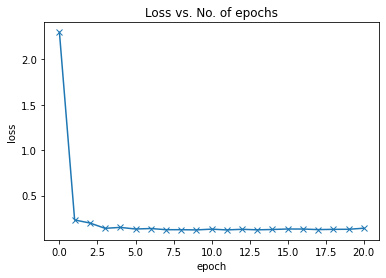

In [ ]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

In [ ]:
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=ToTensor())

In [ ]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


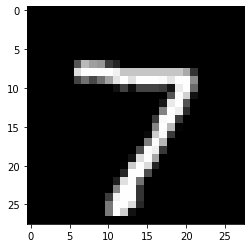

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 2


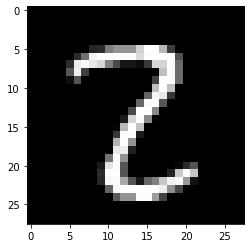

In [ ]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size=256), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.1353204846382141, 'val_acc': 0.9658203125}

# Логистическая регрессия (сверточная сеть. там произошло переобучение)

In [ ]:
# ну как обычно картинки 60000, 32х32, 10 классов

In [ ]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from torch.utils.data.dataloader import DataLoader

import torch.nn as nn
import torch.nn.functional as F

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
project_name='05-cifar10-cnn'

In [ ]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

  0%|          | 0/135107811 [00:00<?, ?it/s]

In [ ]:
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

In [ ]:
data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['train', 'test']
['deer', 'cat', 'airplane', 'truck', 'horse', 'automobile', 'frog', 'ship', 'dog', 'bird']


In [ ]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print('No. of training examples for airplanes:', len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes: 5000
['3406.png', '3753.png', '4976.png', '2302.png', '3228.png']


In [ ]:
ship_test_files = os.listdir(data_dir + "/test/ship")
print("No. of test examples for ship:", len(ship_test_files))
print(ship_test_files[:5])

No. of test examples for ship: 1000
['0963.png', '0901.png', '0511.png', '0384.png', '0212.png']


In [ ]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

In [ ]:
img, label = dataset[0]
print(img.shape, label)
#img

torch.Size([3, 32, 32]) 0


In [ ]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  airplane (0)


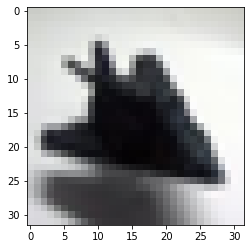

In [ ]:
show_example(*dataset[0])

In [ ]:
random_seed = 42
torch.manual_seed(random_seed);

In [ ]:
val_size = 5000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [ ]:
batch_size=128
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

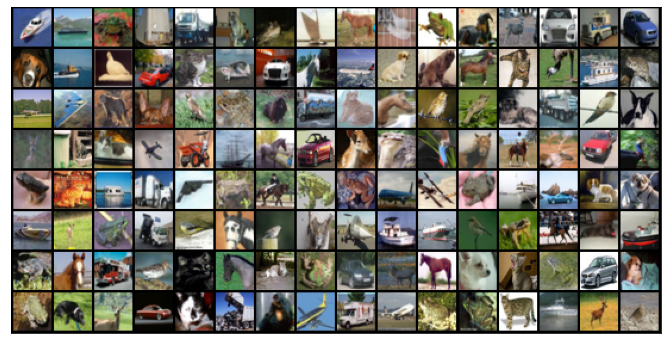

In [ ]:
show_batch(train_dl)

In [ ]:
def apply_kernel(image, kernel):
    ri, ci = image.shape       # image dimensions
    rk, ck = kernel.shape      # kernel dimensions
    ro, co = ri-rk+1, ci-ck+1  # output dimensions
    output = torch.zeros([ro, co])
    for i in range(ro): 
        for j in range(co):
            output[i,j] = torch.sum(image[i:i+rk,j:j+ck] * kernel)
    return output

In [ ]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

In [ ]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)

for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = simple_model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 8, 16, 16])


In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [ ]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 10])
out[0]: tensor([ 0.0239, -0.0466,  0.0067,  0.0193,  0.0044, -0.0598, -0.0188, -0.0242,
         0.0431, -0.0164], grad_fn=<SelectBackward0>)


In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = to_device(Cifar10CnnModel(), device)

In [ ]:
evaluate(model, val_dl)

{'val_loss': 2.302245855331421, 'val_acc': 0.10039062798023224}

In [ ]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [ ]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.7253, val_loss: 1.3530, val_acc: 0.4963
Epoch [1], train_loss: 1.2270, val_loss: 1.0869, val_acc: 0.6001
Epoch [2], train_loss: 0.9723, val_loss: 0.9183, val_acc: 0.6670
Epoch [3], train_loss: 0.7917, val_loss: 0.7924, val_acc: 0.7246
Epoch [4], train_loss: 0.6478, val_loss: 0.7519, val_acc: 0.7493
Epoch [5], train_loss: 0.5283, val_loss: 0.7205, val_acc: 0.7561
Epoch [6], train_loss: 0.4266, val_loss: 0.7897, val_acc: 0.7555
Epoch [7], train_loss: 0.3296, val_loss: 0.7637, val_acc: 0.7660
Epoch [8], train_loss: 0.2540, val_loss: 0.8223, val_acc: 0.7621
Epoch [9], train_loss: 0.1899, val_loss: 0.9484, val_acc: 0.7627


In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

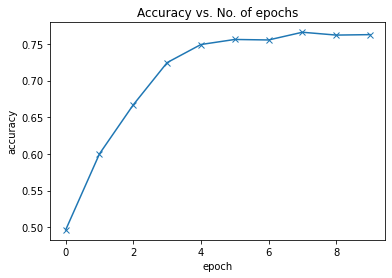

In [ ]:
plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

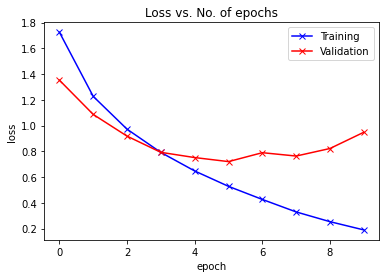

In [ ]:
plot_losses(history)

In [ ]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: airplane , Predicted: airplane


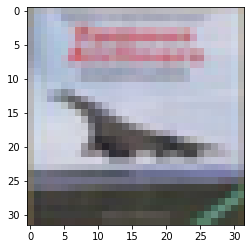

In [ ]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: automobile , Predicted: automobile


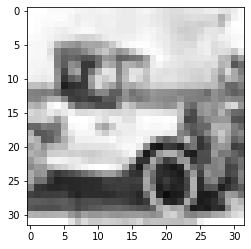

In [ ]:
img, label = test_dataset[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: frog , Predicted: frog


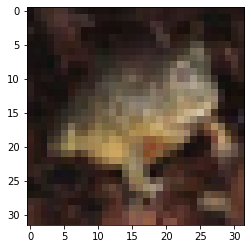

In [ ]:
img, label = test_dataset[6153]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
torch.save(model.state_dict(), 'cifar10-cnn.pth')

In [ ]:
model2 = to_device(Cifar10CnnModel(), device)

In [ ]:
model2.load_state_dict(torch.load('cifar10-cnn.pth'))

<All keys matched successfully>

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.9074061512947083, 'val_acc': 0.761425793170929}

In [ ]:
evaluate(model2, test_loader)

{'val_loss': 0.9074061512947083, 'val_acc': 0.761425793170929}

# Классификация с регуляризацией, аугментацией и другой моделью

In [ ]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

from torchvision.datasets.utils import download_url

In [ ]:
project_name='05b-cifar10-resnet'

In [ ]:
# Dowload the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')
    
# Look into the data directory
data_dir = './data/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

Using downloaded and verified file: ./cifar10.tgz
['train', 'test']
['deer', 'cat', 'airplane', 'truck', 'horse', 'automobile', 'frog', 'ship', 'dog', 'bird']


In [ ]:
# Data transforms (normalization & data augmentation)
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         # tt.RandomRotate
                         # tt.RandomResizedCrop(256, scale=(0.5,0.9), ratio=(1, 1)), 
                         # tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

In [ ]:
train_ds = ImageFolder(data_dir+'/train', train_tfms)
valid_ds = ImageFolder(data_dir+'/test', valid_tfms)

In [ ]:
batch_size = 400

In [ ]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=3, pin_memory=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        denorm_images = denormalize(images, *stats)
        ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

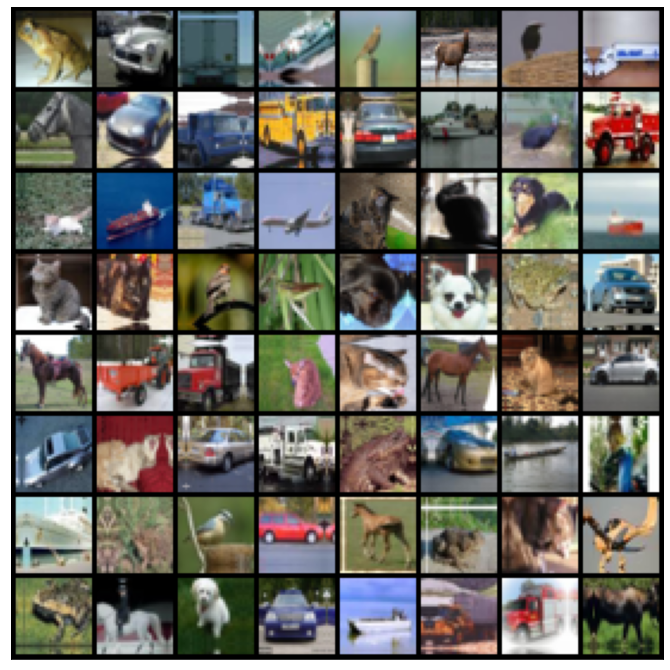

In [ ]:
show_batch(train_dl)

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [ ]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

In [ ]:
simple_resnet = to_device(SimpleResidualBlock(), device)

for images, labels in train_dl:
    out = simple_resnet(images)
    print(out.shape)
    break
    
del simple_resnet, images, labels
torch.cuda.empty_cache()

torch.Size([400, 3, 32, 32])


In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [ ]:
model = to_device(ResNet9(3, 10), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 2.30202579498291, 'val_acc': 0.0921153873205185}]

In [ ]:
epochs = 8
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00393, train_loss: 1.5244, val_loss: 1.6426, val_acc: 0.5129
Epoch [1], last_lr: 0.00935, train_loss: 1.0691, val_loss: 1.0465, val_acc: 0.6452
Epoch [2], last_lr: 0.00972, train_loss: 0.8516, val_loss: 0.8377, val_acc: 0.7141
Epoch [3], last_lr: 0.00812, train_loss: 0.6366, val_loss: 0.5680, val_acc: 0.8062
Epoch [4], last_lr: 0.00556, train_loss: 0.5070, val_loss: 0.5741, val_acc: 0.8033
Epoch [5], last_lr: 0.00283, train_loss: 0.3943, val_loss: 0.3884, val_acc: 0.8678
Epoch [6], last_lr: 0.00077, train_loss: 0.2991, val_loss: 0.3058, val_acc: 0.8946
Epoch [7], last_lr: 0.00000, train_loss: 0.2219, val_loss: 0.2773, val_acc: 0.9069
CPU times: user 41.8 s, sys: 14.5 s, total: 56.3 s
Wall time: 4min 33s


In [ ]:
train_time='4:24'

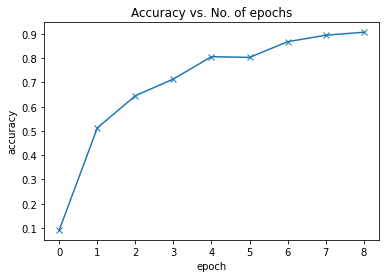

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

plot_accuracies(history)

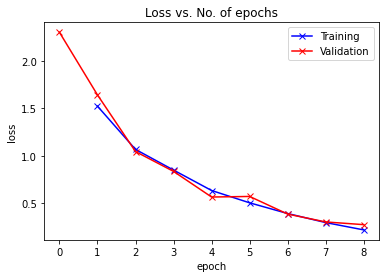

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)

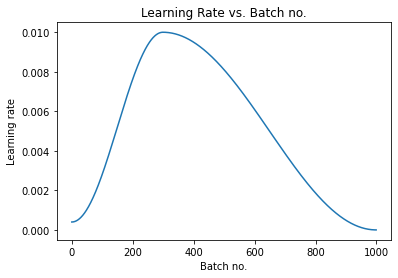

In [ ]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

plot_lrs(history)

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_ds.classes[preds[0].item()]

Label: airplane , Predicted: airplane


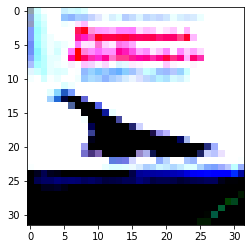

In [ ]:
img, label = valid_ds[0]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: automobile , Predicted: truck


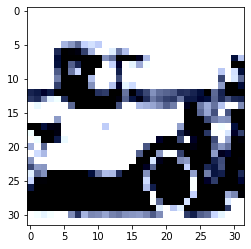

In [ ]:
img, label = valid_ds[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: frog , Predicted: frog


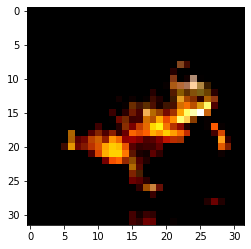

In [ ]:
img, label = valid_ds[6153]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
torch.save(model.state_dict(), 'cifar10-resnet9.pth')

# Gan

In [ ]:
import torch
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose
from torchvision.datasets import MNIST

import matplotlib.pyplot as plt
%matplotlib inline

from torch.utils.data import DataLoader

import torch.nn as nn

import os

from IPython.display import Image
from torchvision.utils import save_image

import cv2
import os
from IPython.display import FileLink

In [ ]:
mnist = MNIST(root='data', 
              train=True, 
              download=True,
              transform=Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))]))

In [ ]:
img, label = mnist[0]
print('Label: ', label)
print(img[:,10:15,10:15])
torch.min(img), torch.max(img)

Label:  5
tensor([[[-0.9922,  0.2078,  0.9843, -0.2941, -1.0000],
         [-1.0000,  0.0902,  0.9843,  0.4902, -0.9843],
         [-1.0000, -0.9137,  0.4902,  0.9843, -0.4510],
         [-1.0000, -1.0000, -0.7255,  0.8902,  0.7647],
         [-1.0000, -1.0000, -1.0000, -0.3647,  0.8824]]])


(tensor(-1.), tensor(1.))

In [ ]:
def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

Label: 5


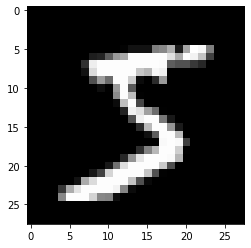

In [ ]:
img_norm = denorm(img)
plt.imshow(img_norm[0], cmap='gray')
print('Label:', label)

first batch
torch.Size([100, 1, 28, 28])
tensor([0, 1, 4, 2, 1, 2, 8, 9, 7, 1, 3, 2, 6, 9, 9, 9, 1, 9, 4, 1, 8, 4, 5, 3,
        4, 3, 8, 4, 2, 7, 0, 1, 4, 4, 6, 1, 9, 4, 1, 3, 5, 4, 5, 2, 0, 8, 0, 2,
        4, 9, 2, 6, 3, 9, 4, 4, 2, 1, 8, 2, 6, 9, 7, 6, 2, 0, 4, 2, 2, 4, 3, 2,
        4, 4, 0, 5, 1, 6, 4, 0, 7, 6, 4, 8, 4, 7, 9, 1, 7, 2, 9, 1, 8, 3, 8, 2,
        4, 0, 0, 1])


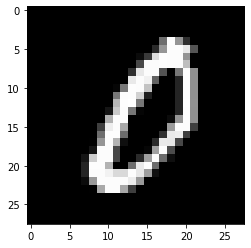

In [ ]:
batch_size = 100
data_loader = DataLoader(mnist, batch_size, shuffle=True)

for img_batch, label_batch in data_loader:
    print('first batch')
    print(img_batch.shape)
    plt.imshow(img_batch[0][0], cmap='gray')
    print(label_batch)
    break

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
device

device(type='cuda')

In [ ]:
image_size = 784
hidden_size = 256

In [ ]:
D = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid())

In [ ]:
D.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): LeakyReLU(negative_slope=0.2)
  (4): Linear(in_features=256, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
latent_size = 64

In [ ]:
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh())

In [ ]:
y = G(torch.randn(2, latent_size))
gen_imgs = denorm(y.reshape((-1, 28,28)).detach())

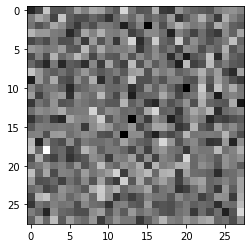

In [ ]:
plt.imshow(gen_imgs[0], cmap='gray')

In [ ]:
G.to(device)

Sequential(
  (0): Linear(in_features=64, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=784, bias=True)
  (5): Tanh()
)

In [ ]:
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)

In [ ]:
def reset_grad():
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()

def train_discriminator(images):
    # Create the labels which are later used as input for the BCE loss
    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)
        
    # Loss for real images
    outputs = D(images)
    d_loss_real = criterion(outputs, real_labels)
    real_score = outputs

    # Loss for fake images
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    outputs = D(fake_images)
    d_loss_fake = criterion(outputs, fake_labels)
    fake_score = outputs

    # Combine losses
    d_loss = d_loss_real + d_loss_fake
    # Reset gradients
    reset_grad()
    # Compute gradients
    d_loss.backward()
    # Adjust the parameters using backprop
    d_optimizer.step()
    
    return d_loss, real_score, fake_score

In [ ]:
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

In [ ]:
def train_generator():
    # Generate fake images and calculate loss
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    labels = torch.ones(batch_size, 1).to(device)
    g_loss = criterion(D(fake_images), labels)

    # Backprop and optimize
    reset_grad()
    g_loss.backward()
    g_optimizer.step()
    return g_loss, fake_images

In [ ]:
sample_dir = 'samples'
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

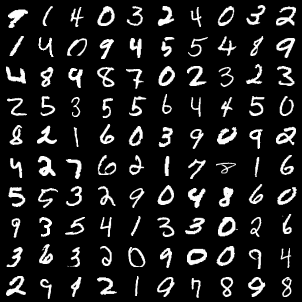

In [ ]:
# Save some real images
for images, _ in data_loader:
    images = images.reshape(images.size(0), 1, 28, 28)
    save_image(denorm(images), os.path.join(sample_dir, 'real_images.png'), nrow=10)
    break
   
Image(os.path.join(sample_dir, 'real_images.png'))

Saving fake_images-0000.png


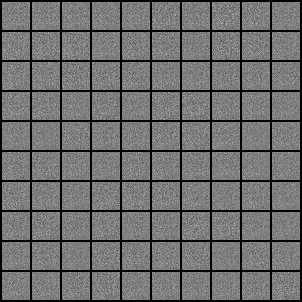

In [ ]:
sample_vectors = torch.randn(batch_size, latent_size).to(device)

def save_fake_images(index):
    fake_images = G(sample_vectors)
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
    fake_fname = 'fake_images-{0:0=4d}.png'.format(index)
    print('Saving', fake_fname)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=10)
    
# Before training
save_fake_images(0)
Image(os.path.join(sample_dir, 'fake_images-0000.png'))

In [ ]:
%%time

num_epochs = 300
total_step = len(data_loader)
d_losses, g_losses, real_scores, fake_scores = [], [], [], []

for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        # Load a batch & transform to vectors
        images = images.reshape(batch_size, -1).to(device)
        
        # Train the discriminator and generator
        d_loss, real_score, fake_score = train_discriminator(images)
        g_loss, fake_images = train_generator()
        
        # Inspect the losses
        if (i+1) % 200 == 0:
            d_losses.append(d_loss.item())
            g_losses.append(g_loss.item())
            real_scores.append(real_score.mean().item())
            fake_scores.append(fake_score.mean().item())
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
        
    # Sample and save images
    save_fake_images(epoch+1)

Epoch [0/300], Step [200/600], d_loss: 0.0357, g_loss: 4.4718, D(x): 0.99, D(G(z)): 0.03
Epoch [0/300], Step [400/600], d_loss: 0.1007, g_loss: 6.8062, D(x): 0.95, D(G(z)): 0.03
Epoch [0/300], Step [600/600], d_loss: 0.0405, g_loss: 5.3095, D(x): 0.98, D(G(z)): 0.02
Saving fake_images-0001.png
Epoch [1/300], Step [200/600], d_loss: 0.0284, g_loss: 5.5653, D(x): 0.99, D(G(z)): 0.02
Epoch [1/300], Step [400/600], d_loss: 0.0727, g_loss: 4.6620, D(x): 0.98, D(G(z)): 0.05
Epoch [1/300], Step [600/600], d_loss: 0.7436, g_loss: 2.2033, D(x): 0.74, D(G(z)): 0.24
Saving fake_images-0002.png
Epoch [2/300], Step [200/600], d_loss: 0.2218, g_loss: 3.1791, D(x): 0.91, D(G(z)): 0.11
Epoch [2/300], Step [400/600], d_loss: 0.3866, g_loss: 3.7706, D(x): 0.87, D(G(z)): 0.14
Epoch [2/300], Step [600/600], d_loss: 0.7491, g_loss: 4.2145, D(x): 0.91, D(G(z)): 0.36
Saving fake_images-0003.png
Epoch [3/300], Step [200/600], d_loss: 0.2652, g_loss: 3.3516, D(x): 0.90, D(G(z)): 0.09
Epoch [3/300], Step [400/6

In [ ]:
torch.save(G.state_dict(), 'G.ckpt')
torch.save(D.state_dict(), 'D.ckpt')

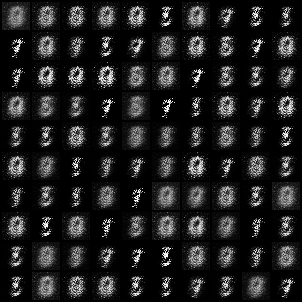

In [ ]:
Image('./samples/fake_images-0010.png')

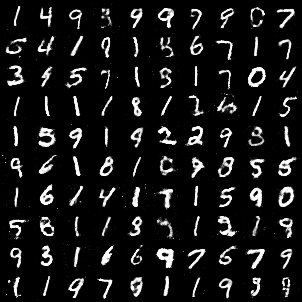

In [ ]:
Image('./samples/fake_images-0300.png')

In [ ]:
vid_fname = 'gans_training.avi'

files = [os.path.join(sample_dir, f) for f in os.listdir(sample_dir) if 'fake_images' in f]
files.sort()

out = cv2.VideoWriter(vid_fname,cv2.VideoWriter_fourcc(*'MP4V'), 8, (302,302))
[out.write(cv2.imread(fname)) for fname in files]
out.release()
FileLink('gans_training.avi')

/content/gans_training.avi

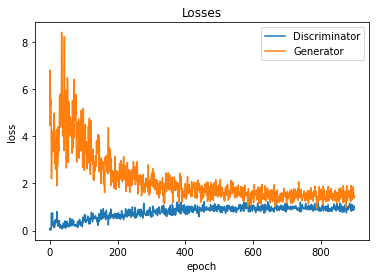

In [ ]:
plt.plot(d_losses, '-')
plt.plot(g_losses, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

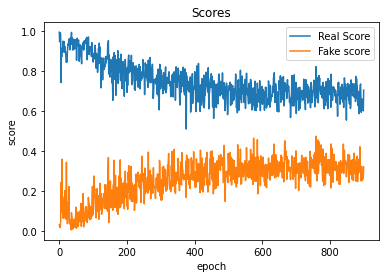

In [ ]:
plt.plot(real_scores, '-')
plt.plot(fake_scores, '-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real Score', 'Fake score'])
plt.title('Scores');

# Детекция

install

In [1]:
# Install dependencies and 
!pip install albumentations==0.4.6
!pip install pycocotools --quiet

# Clone TorchVision repo and copy helper files
!git clone https://github.com/pytorch/vision.git
%cd vision
!git checkout v0.3.0
%cd ..
!cp vision/references/detection/utils.py ./
!cp vision/references/detection/transforms.py ./
!cp vision/references/detection/coco_eval.py ./
!cp vision/references/detection/engine.py ./
!cp vision/references/detection/coco_utils.py ./

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 117 kB 14.0 MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-py3-none-any.whl size=65173 sha256=df41dd0276516018ea7d3a2fd71f514f78b8dc03b0ff355e49f2f8955ae997f4
  Stored in directory: /root/.cache/pip/wheels/d2/e3/0b/99a239413035502833a7b07283894243fddf5ce3aa720ca8dd
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1
Cloning into 'vision'...
remote: Enumerating objects: 258061, done.
remote: Counting objects: 100% (10739/10739), done.
remote: Compressing objects: 100% (668/668), done.
remote: Total 258061 (delta 10112), reused 10602 (delta 10050), pack-reused 247322
Receiving objects: 100% (258061/258061), 519.31 MiB | 19.54 MiB/s, done.
Resolving deltas: 100% (2

In [2]:
# basic python and ML Libraries
import os
import random
import numpy as np
import pandas as pd

# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# We will be reading images using OpenCV
import cv2

# matplotlib for visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# torchvision libraries
import torch
import torchvision
from torchvision import transforms as torchtrans  
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# helper libraries
from engine import train_one_epoch, evaluate
import utils
import transforms as T

# for image augmentations
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2


Dataset

In [3]:
!wget -O data.rar https://www.dropbox.com/sh/ay9wf7ii81q5zif/AADwIb9HkvpBmUDJvKpNl0Xna?dl=0&file_subpath=%2Fimg&preview=data.rar#:~:text=Sign%20up-,Direct,-download
!unrar x data.rar
# image 96 had no annotations, so we'll delete it!
!rm img/96.jpg

--2022-12-02 10:56:37--  https://www.dropbox.com/sh/ay9wf7ii81q5zif/AADwIb9HkvpBmUDJvKpNl0Xna?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/ay9wf7ii81q5zif/AADwIb9HkvpBmUDJvKpNl0Xna [following]
--2022-12-02 10:56:37--  https://www.dropbox.com/sh/raw/ay9wf7ii81q5zif/AADwIb9HkvpBmUDJvKpNl0Xna
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc67b384ed9ef549b504e2881ff3.dl.dropboxusercontent.com/zip_download_get/BVMorMnCNZ_O8AIQqMso96vR_TtPsOlocGmFsUyNrb9Qyq2-B3JJm1JlV__UHbPs3f2_OoKE1CFMTB4dhWm-uMFC1In85se-tgD7b_8RnUcV7Q# [following]
--2022-12-02 10:56:38--  https://uc67b384ed9ef549b504e2881ff3.dl.dropboxusercontent.com/zip_download_get/BVMorMnCNZ_O8AIQqMso96vR_TtPsOlocGmFsUyNrb9Qyq2-B3JJm1JlV__UHbPs3f2_OoKE1CFMTB4dhWm-uMFC1

In [4]:
# defining the files directory and testing directory
files_dir = '/content/img/'
test_dir = '/content/img1/'

# we create a Dataset class which has a __getitem__ function and a __len__ function
class ConeImagesDataset(torch.utils.data.Dataset):

  def __init__(self, files_dir, width, height, transforms=None):
    self.transforms = transforms
    self.files_dir = files_dir
    self.height = height
    self.width = width
    
    # sorting the images for consistency
    # To get images, the extension of the filename is checked to be jpg
    self.imgs = [image for image in sorted(os.listdir(files_dir)) if image[-4:]=='.jpg']
    
    # classes: 0 index is reserved for background
    self.classes = [_, 'cone']

  def __getitem__(self, idx):
    img_name = self.imgs[idx]
    image_path = os.path.join(self.files_dir, img_name)

    # reading the images and converting them to correct size and color    
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
    img_res = cv2.resize(img_rgb, (self.width, self.height), cv2.INTER_AREA)
    # diving by 255
    img_res /= 255.0
    
    # annotation file
    annot_filename = img_name[:-4] + '.txt'
    annot_file_path = os.path.join(self.files_dir, annot_filename)
    
    boxes = []
    labels = []
    
    # cv2 image gives size as height x width
    wt = img.shape[1]
    ht = img.shape[0]
    
    # box coordinates for xml files are extracted and corrected for image size given
    with open(annot_file_path) as f:
      for line in f:
        labels.append(1)
        
        parsed = [float(x) for x in line.split(' ')]
        x_center = parsed[1]
        y_center = parsed[2]
        box_wt = parsed[3]
        box_ht = parsed[4]

        xmin = x_center - box_wt/2
        xmax = x_center + box_wt/2
        ymin = y_center - box_ht/2
        ymax = y_center + box_ht/2
        
        xmin_corr = int(xmin*self.width)
        xmax_corr = int(xmax*self.width)
        ymin_corr = int(ymin*self.height)
        ymax_corr = int(ymax*self.height)
        
        boxes.append([xmin_corr, ymin_corr, xmax_corr, ymax_corr])
    
    # convert boxes into a torch.Tensor
    boxes = torch.as_tensor(boxes, dtype=torch.float32)
    
    # getting the areas of the boxes
    area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])

    # suppose all instances are not crowd
    iscrowd = torch.zeros((boxes.shape[0],), dtype=torch.int64)
    
    labels = torch.as_tensor(labels, dtype=torch.int64)

    target = {}
    target["boxes"] = boxes
    target["labels"] = labels
    target["area"] = area
    target["iscrowd"] = iscrowd
    image_id = torch.tensor([idx])
    target["image_id"] = image_id

    if self.transforms:
      sample = self.transforms(image = img_res,
                                bboxes = target['boxes'],
                                labels = labels)
      img_res = sample['image']
      target['boxes'] = torch.Tensor(sample['bboxes'])
        
    return img_res, target

  def __len__(self):
    return len(self.imgs)


# check dataset
dataset = ConeImagesDataset(files_dir, 224, 224)
print('Length of dataset:', len(dataset), '\n')

# getting the image and target for a test index.  Feel free to change the index.
img, target = dataset[78]
print('Image shape:', img.shape)
print('Label example:', target)

Length of dataset: 122 

Image shape: (224, 224, 3)
Label example: {'boxes': tensor([[174.,   1., 220., 130.]]), 'labels': tensor([1]), 'area': tensor([5934.]), 'iscrowd': tensor([0]), 'image_id': tensor([78])}


Visualization. Тут добавил .permute(1, 2, 0), а то не работало чет

In [7]:
# Function to visualize bounding boxes in the image
def plot_img_bbox(img, target):
  # plot the image and bboxes
  # Bounding boxes are defined as follows: x-min y-min width height
  fig, a = plt.subplots(1,1)
  fig.set_size_inches(5,5)
  a.imshow(img)
  for box in (target['boxes']):
    x, y, width, height  = box[0], box[1], box[2]-box[0], box[3]-box[1]
    rect = patches.Rectangle(
      (int(x), int(y)),
      int(width), int(height),
      linewidth = 2,
      edgecolor = 'r',
      facecolor = 'none'
    )
    # Draw the bounding box on top of the image
    a.add_patch(rect)
  plt.show()

# Function to visualize bounding boxes in the image
def plot_img_bbox1(img, target):
  # plot the image and bboxes
  # Bounding boxes are defined as follows: x-min y-min width height
  fig, a = plt.subplots(1,1)
  fig.set_size_inches(5,5)
  a.imshow(img.permute(1, 2, 0))
  for box in (target['boxes']):
    x, y, width, height  = box[0], box[1], box[2]-box[0], box[3]-box[1]
    rect = patches.Rectangle(
      (int(x), int(y)),
      int(width), int(height),
      linewidth = 2,
      edgecolor = 'r',
      facecolor = 'none'
    )
    # Draw the bounding box on top of the image
    a.add_patch(rect)
  plt.show()

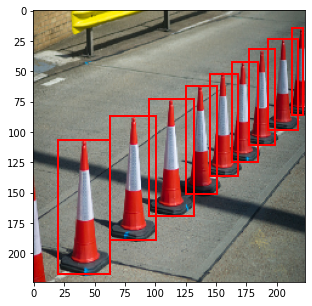

In [8]:
# plotting the image with bboxes. Feel free to change the index
img, target = dataset[25]
plot_img_bbox(img, target)

Augmentations

In [9]:
# Send train=True for training transforms and False for val/test transforms
def get_transform(train):
  if train:
    return A.Compose(
      [
        A.HorizontalFlip(0.5),
        # ToTensorV2 converts image to pytorch tensor without div by 255
        ToTensorV2(p=1.0) 
      ],
      bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']}
    )
  else:
    return A.Compose(
      [ToTensorV2(p=1.0)],
      bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']}
    )

Dataloaders

In [10]:
# use our dataset and defined transformations
dataset = ConeImagesDataset(files_dir, 480, 480, transforms=get_transform(train=True))
dataset_test = ConeImagesDataset(files_dir, 480, 480, transforms=get_transform(train=False))

# split the dataset in train and test set
torch.manual_seed(1)
indices = torch.randperm(len(dataset)).tolist()

# train test split
test_split = 0.2
tsize = int(len(dataset)*test_split)
dataset = torch.utils.data.Subset(dataset, indices[:-tsize])
dataset_test = torch.utils.data.Subset(dataset_test, indices[-tsize:])

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
  dataset,
  batch_size=10,
  shuffle=True,
  num_workers=4,
  collate_fn=utils.collate_fn,
)

data_loader_test = torch.utils.data.DataLoader(
  dataset_test,
  batch_size=10,
  shuffle=False,
  num_workers=4,
  collate_fn=utils.collate_fn,
)

Pre-trained Model

In [11]:
def get_object_detection_model(num_classes):
  # load a model pre-trained pre-trained on COCO
  model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
  # get number of input features for the classifier
  in_features = model.roi_heads.box_predictor.cls_score.in_features
  # replace the pre-trained head with a new one
  model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes) 
  return model

Training

In [12]:
# train on gpu if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

num_classes = 2 # one class (class 0) is dedicated to the "background"

# get the model using our helper function
model = get_object_detection_model(num_classes)

# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(
  optimizer,
  step_size=3,
  gamma=0.1
)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [13]:
# training for 5 epochs
num_epochs = 5

for epoch in range(num_epochs):
    # training for one epoch
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, data_loader_test, device=device)

Epoch: [0]  [ 0/10]  eta: 0:01:34  lr: 0.000560  loss: 1.4190 (1.4190)  loss_classifier: 0.8098 (0.8098)  loss_box_reg: 0.3944 (0.3944)  loss_objectness: 0.1819 (0.1819)  loss_rpn_box_reg: 0.0329 (0.0329)  time: 9.4445  data: 0.9011  max mem: 8205
Epoch: [0]  [ 9/10]  eta: 0:00:02  lr: 0.005000  loss: 0.7061 (0.8587)  loss_classifier: 0.3275 (0.4439)  loss_box_reg: 0.3076 (0.3325)  loss_objectness: 0.0286 (0.0621)  loss_rpn_box_reg: 0.0150 (0.0202)  time: 2.4501  data: 0.1195  max mem: 8473
Epoch: [0] Total time: 0:00:24 (2.4575 s / it)
creating index...
index created!
Test:  [0/3]  eta: 0:00:03  model_time: 0.7494 (0.7494)  evaluator_time: 0.0465 (0.0465)  time: 1.2071  data: 0.4011  max mem: 8473
Test:  [2/3]  eta: 0:00:00  model_time: 0.7447 (0.6012)  evaluator_time: 0.0373 (0.0309)  time: 0.7771  data: 0.1368  max mem: 8473
Test: Total time: 0:00:02 (0.8098 s / it)
Averaged stats: model_time: 0.7447 (0.6012)  evaluator_time: 0.0373 (0.0309)
Accumulating evaluation results...
DONE (

Filtering the outputs

In [14]:
# the function takes the original prediction and the iou threshold.
def apply_nms(orig_prediction, iou_thresh=0.3):
  # torchvision returns the indices of the bboxes to keep
  keep = torchvision.ops.nms(orig_prediction['boxes'], orig_prediction['scores'], iou_thresh)
  
  final_prediction = orig_prediction
  final_prediction['boxes'] = final_prediction['boxes'][keep]
  final_prediction['scores'] = final_prediction['scores'][keep]
  final_prediction['labels'] = final_prediction['labels'][keep]
  
  return final_prediction

# function to convert a torchtensor back to PIL image
def torch_to_pil(img):
  return torchtrans.ToPILImage()(img).convert('RGB')

Testing our Model. Тензоры поправил. какие-то проблемы с конвертацией

MODEL OUTPUT



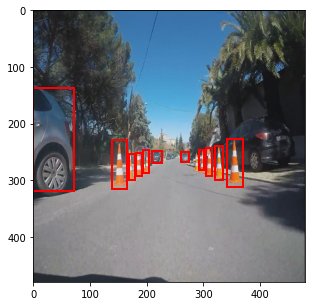

In [19]:
test_dataset = ConeImagesDataset(test_dir, 480, 480, transforms= get_transform(train=True))

# pick one image from the test set
img, target = test_dataset[6]

# put the model in evaluation mode
model.eval()

with torch.no_grad():
  prediction = model([img.to(device)])[0]

print('MODEL OUTPUT\n')
nms_prediction = apply_nms(prediction, iou_thresh=0.01)

#plot_img_bbox(torch_to_pil(img), nms_prediction)
plot_img_bbox1(img, nms_prediction)